In [1]:
from run_experiment import Experiment
from radar_plots import RadarPlot
import os
import sys
current_directory = os.getcwd()
if not os.path.exists(current_directory + '\\experimental_data'):
    os.makedirs(current_directory + '\\experimental_data')
    os.makedirs(current_directory + '\\experimental_data\\plots')
    os.makedirs(current_directory + '\\experimental_data\\results')
sys.path.append(current_directory.replace('experiments', ''))
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')
from run import execute_simulation, create_experiment_snapshots, execute_ai_model, single_mtd_simulation, mtd_ai_simulation, multiple_mtd_simulation, specific_multiple_mtd_simulation
from mtdnetwork.mtd.completetopologyshuffle import CompleteTopologyShuffle
from mtdnetwork.mtd.ipshuffle import IPShuffle
from mtdnetwork.mtd.hosttopologyshuffle import HostTopologyShuffle
from mtdnetwork.mtd.portshuffle import PortShuffle
from mtdnetwork.mtd.osdiversity import OSDiversity
from mtdnetwork.mtd.servicediversity import ServiceDiversity
from mtdnetwork.mtd.usershuffle import UserShuffle
from mtdnetwork.mtd.osdiversityassignment import OSDiversityAssignment
import logging
import pandas as pd
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from stacked_plots import StackedBarChart
logging.basicConfig(format='%(message)s', level=logging.INFO)

In [2]:
# Learning Parameters
epsilon = 1.0  # exploration rate

# Simulator Settings
start_time = 0
finish_time = 15000
mtd_interval = [200]
network_size = [150]
total_nodes = 150
new_network = True

trial = 500


mtd_strategies = [
    CompleteTopologyShuffle,
    # HostTopologyShuffle,
    IPShuffle,
    OSDiversity,
    # PortShuffle,
    # OSDiversityAssignment,
    ServiceDiversity,
    # UserShuffle
]

result_head_path = '/Users/williamho/Documents/GitHub/MTDSim'

static_features = ["host_compromise_ratio", "exposed_endpoints", "attack_path_exposure",  "overall_asr_avg", "roa", "shortest_path_variability", "risk"]
time_features = ["mtd_freq", "overall_mttc_avg", "time_since_last_mtd"]
metrics = ["all_features"] + static_features + time_features



{'random': {'ASR': 1.4722222222222223, 'time_to_compromise': 1.4659171297011173, 'attack_path_exposure': 0.9358105558657954, 'ROA': 0.8333602423320229, 'risk': 0.9295818359469153}, 'alternative': {'ASR': 1.4583333333333335, 'time_to_compromise': 1.4450191486143427, 'attack_path_exposure': 0.9357752473230252, 'ROA': 0.8333602423320229, 'risk': 0.9486668488685682}, 'simultaneous': {'ASR': 2.708333333333334, 'time_to_compromise': 1.7163759880443128, 'attack_path_exposure': 0.9343932486908034, 'ROA': 0.8333602423320229, 'risk': 1.0383848656780987}}


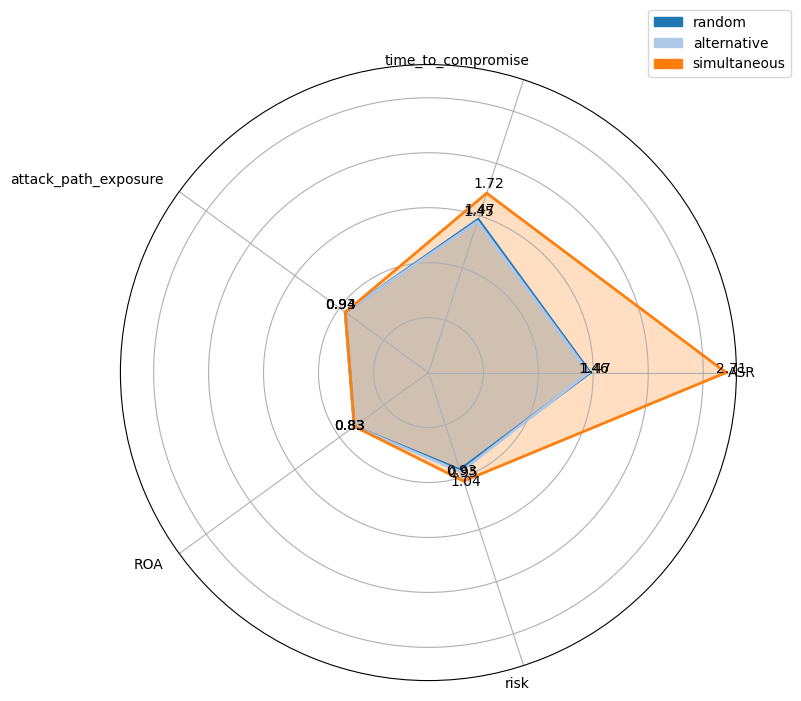

In [3]:
radar = RadarPlot("all_features",epsilon, start_time, finish_time, mtd_interval, network_size,total_nodes, new_network,  "other_scheme", trial, result_head_path)
schemes_data = pd.DataFrame(radar.multiple_scaled_pipeline(["random", "alternative", "simultaneous"],run_trial = False)).T.drop(columns=['MEF', 'host_compromise_ratio','network_size', 'exposed_endpoints', "mtd_interval", 'shortest_path_variability'], axis = 1).T.to_dict()
print(schemes_data)
radar.plot_n_schemes(schemes_data)

In [4]:
other_schemes =pd.DataFrame(schemes_data)

In [5]:
other_schemes

,random,alternative,simultaneous
ASR,1.472222,1.458333,2.708333
time_to_compromise,1.465917,1.445019,1.716376
attack_path_exposure,0.935811,0.935775,0.934393
ROA,0.833360,0.833360,0.833360
risk,0.929582,0.948667,1.038385


In [6]:
import pandas as pd

# Create an empty DataFrame to store all the data for all metrics
all_model_data = pd.DataFrame()

for metric in metrics:
    models = [
        metric,
        f"{metric}_CompleteTopologyShuffle",
        f"{metric}_IPShuffle",
        f"{metric}_OSDiversity",
        f"{metric}_ServiceDiversity"
    ]
    
        
    # Initialize the chart for the current model
    chart = StackedBarChart(metric, epsilon, start_time, finish_time, mtd_interval, network_size, total_nodes, new_network, "overview", trial, result_head_path)
    weights = {'ASR': 1, 'time_to_compromise': 1, 'attack_path_exposure': 1, "ROA": 1, "risk": 1}  # Custom weights
    
    # Get data for current model
    schemes_data = pd.DataFrame(chart.multiple_scaled_pipeline(models, run_trial=False))


    
    
    # Concatenate the current schemes_data to all_model_data along the columns (axis=1)
    if all_model_data.empty:
        all_model_data = schemes_data
    else:
        all_model_data = pd.concat([all_model_data, schemes_data], axis=1)





In [7]:
# Now all_schemes_data contains the concatenated data from all models as columns
all_model_data

,all_features,all_features_CompleteTopologyShuffle,all_features_IPShuffle,all_features_OSDiversity,all_features_ServiceDiversity,host_compromise_ratio,host_compromise_ratio_CompleteTopologyShuffle,host_compromise_ratio_IPShuffle,host_compromise_ratio_OSDiversity,host_compromise_ratio_ServiceDiversity,...,overall_mttc_avg,overall_mttc_avg_CompleteTopologyShuffle,overall_mttc_avg_IPShuffle,overall_mttc_avg_OSDiversity,overall_mttc_avg_ServiceDiversity,time_since_last_mtd,time_since_last_mtd_CompleteTopologyShuffle,time_since_last_mtd_IPShuffle,time_since_last_mtd_OSDiversity,time_since_last_mtd_ServiceDiversity
mtd_interval,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
MEF,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
ASR,1.541667,1.500000,1.666667,1.500000,1.500000,1.541667,1.500000,1.666667,1.500000,1.500000,...,1.527778,1.500000,1.666667,1.500000,1.500000,1.533333,1.500000,1.666667,1.500000,1.479167
time_to_compromise,1.539001,1.472921,1.490427,1.705920,1.636373,1.531516,1.463085,1.509948,1.681476,1.622091,...,1.536620,1.452389,1.536698,1.716701,1.594399,1.521410,1.460346,1.524587,1.695276,1.604064
host_compromise_ratio,0.695652,0.695652,0.695652,0.695652,0.695652,0.695652,0.695652,0.695652,0.695652,0.695652,...,0.695652,0.695652,0.695652,0.695652,0.695652,0.695652,0.695652,0.695652,0.695652,0.695652
network_size,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
exposed_endpoints,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
attack_path_exposure,2.430100,2.259621,1.963146,2.659974,2.612895,2.460476,2.188711,1.946506,2.624508,2.583177,...,2.474469,2.211664,1.946506,2.659974,2.608279,2.454340,2.217121,1.917254,2.659974,2.579470
ROA,1.003314,1.103992,0.949342,1.048733,1.009120,1.023495,1.012679,1.046708,1.046538,1.034561,...,1.085373,0.976542,1.109508,0.925607,0.923494,0.965008,1.123553,1.002744,1.061525,0.998388
risk,1.035247,1.098857,1.001395,1.066848,1.043650,0.981797,1.034379,1.099603,1.070677,1.031752,...,1.046105,0.963792,1.182244,0.996320,0.928013,1.036367,1.131064,0.985090,1.081589,0.990844


In [8]:
data = all_model_data.T.drop(columns=['MEF', 'host_compromise_ratio', 'network_size', 'exposed_endpoints', "mtd_interval", 'shortest_path_variability'], axis = 1).T.to_dict()

In [9]:
chart.process_weighted_metrics(other_schemes)

,ASR,time_to_compromise,attack_path_exposure,ROA,risk,sum,zscore,minmax
random,1.472222,1.465917,0.935811,0.83336,0.929582,5.636892,-0.568821,0.009777
alternative,1.458333,1.445019,0.935775,0.83336,0.948667,5.621155,-0.585837,0.000000
simultaneous,2.708333,1.716376,0.934393,0.83336,1.038385,7.230848,1.154659,1.000000


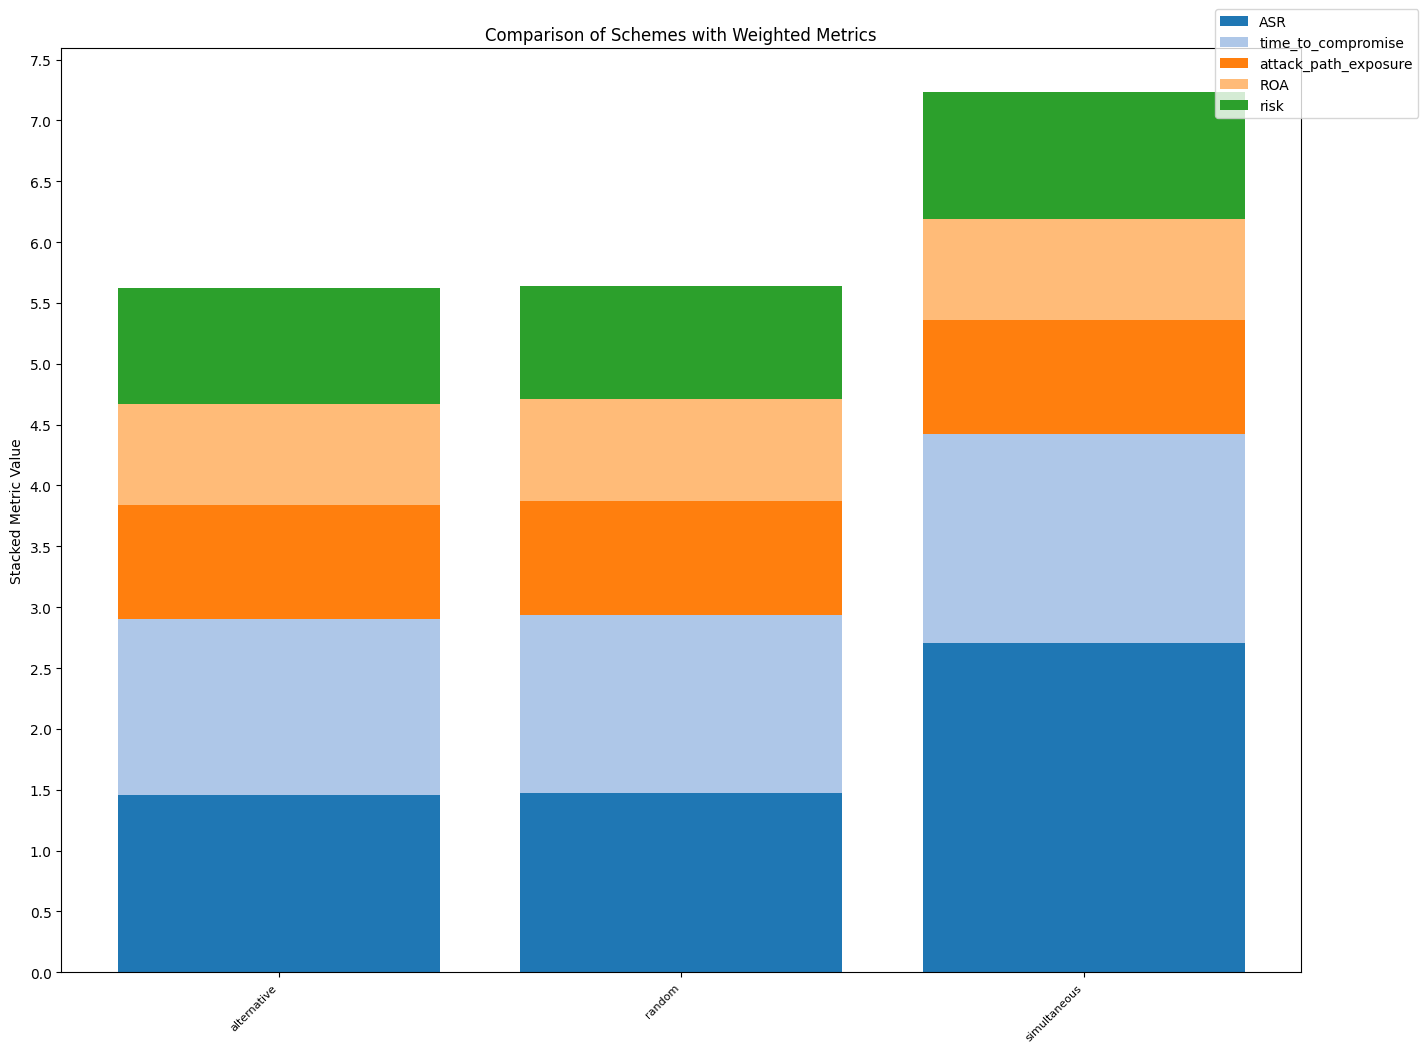

In [10]:
chart.plot_n_schemes()

In [11]:
combined_data = pd.concat([pd.DataFrame(data), other_schemes], axis=1)
chart.process_weighted_metrics(data)

,ASR,time_to_compromise,attack_path_exposure,ROA,risk,sum,zscore,minmax
all_features,1.541667,1.539001,2.430100,1.003314,1.035247,7.549328,0.000291,0.465052
all_features_CompleteTopologyShuffle,1.500000,1.472921,2.259621,1.103992,1.098857,7.435391,-0.349857,0.371641
all_features_IPShuffle,1.666667,1.490427,1.963146,0.949342,1.001395,7.070978,-1.469761,0.072878
all_features_OSDiversity,1.500000,1.705920,2.659974,1.048733,1.066848,7.981475,1.328352,0.819346
all_features_ServiceDiversity,1.500000,1.636373,2.612895,1.009120,1.043650,7.802039,0.776913,0.672235
host_compromise_ratio,1.541667,1.531516,2.460476,1.023495,0.981797,7.538951,-0.031600,0.456544
host_compromise_ratio_CompleteTopologyShuffle,1.500000,1.463085,2.188711,1.012679,1.034379,7.198854,-1.076777,0.177716
host_compromise_ratio_IPShuffle,1.666667,1.509948,1.946506,1.046708,1.099603,7.269432,-0.859876,0.235580
host_compromise_ratio_OSDiversity,1.500000,1.681476,2.624508,1.046538,1.070677,7.923198,1.149256,0.771567
host_compromise_ratio_ServiceDiversity,1.500000,1.622091,2.583177,1.034561,1.031752,7.771581,0.683313,0.647265


In [12]:
combined_data

,all_features,all_features_CompleteTopologyShuffle,all_features_IPShuffle,all_features_OSDiversity,all_features_ServiceDiversity,host_compromise_ratio,host_compromise_ratio_CompleteTopologyShuffle,host_compromise_ratio_IPShuffle,host_compromise_ratio_OSDiversity,host_compromise_ratio_ServiceDiversity,...,overall_mttc_avg_OSDiversity,overall_mttc_avg_ServiceDiversity,time_since_last_mtd,time_since_last_mtd_CompleteTopologyShuffle,time_since_last_mtd_IPShuffle,time_since_last_mtd_OSDiversity,time_since_last_mtd_ServiceDiversity,random,alternative,simultaneous
ASR,1.541667,1.500000,1.666667,1.500000,1.500000,1.541667,1.500000,1.666667,1.500000,1.500000,...,1.500000,1.500000,1.533333,1.500000,1.666667,1.500000,1.479167,1.472222,1.458333,2.708333
time_to_compromise,1.539001,1.472921,1.490427,1.705920,1.636373,1.531516,1.463085,1.509948,1.681476,1.622091,...,1.716701,1.594399,1.521410,1.460346,1.524587,1.695276,1.604064,1.465917,1.445019,1.716376
attack_path_exposure,2.430100,2.259621,1.963146,2.659974,2.612895,2.460476,2.188711,1.946506,2.624508,2.583177,...,2.659974,2.608279,2.454340,2.217121,1.917254,2.659974,2.579470,0.935811,0.935775,0.934393
ROA,1.003314,1.103992,0.949342,1.048733,1.009120,1.023495,1.012679,1.046708,1.046538,1.034561,...,0.925607,0.923494,0.965008,1.123553,1.002744,1.061525,0.998388,0.833360,0.833360,0.833360
risk,1.035247,1.098857,1.001395,1.066848,1.043650,0.981797,1.034379,1.099603,1.070677,1.031752,...,0.996320,0.928013,1.036367,1.131064,0.985090,1.081589,0.990844,0.929582,0.948667,1.038385


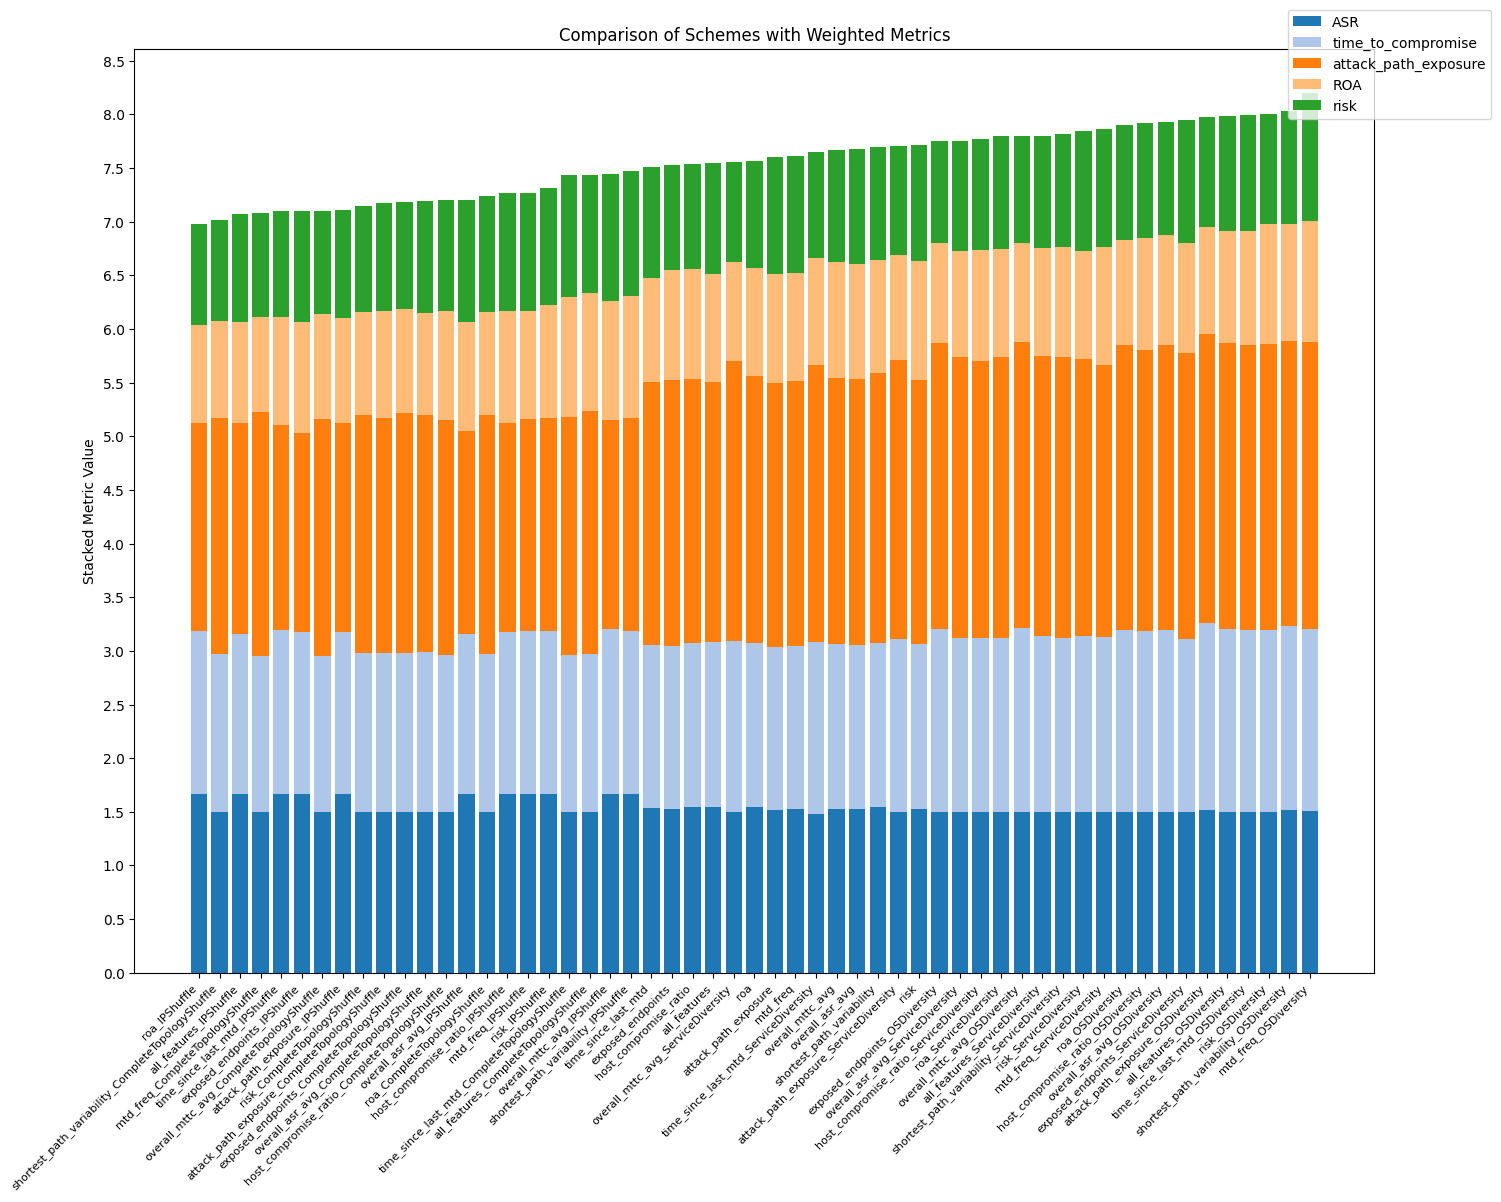

In [13]:
chart.plot_n_schemes()

Feature: roa_IPShuffle, Combination: Static + Shuffling
Feature: shortest_path_variability_CompleteTopologyShuffle, Combination: Dynamic + Shuffling
Feature: all_features_IPShuffle, Combination: All Features + Shuffling
Feature: mtd_freq_CompleteTopologyShuffle, Combination: Dynamic + Shuffling
Feature: time_since_last_mtd_IPShuffle, Combination: Dynamic + Shuffling
Feature: exposed_endpoints_IPShuffle, Combination: Static + Shuffling
Feature: overall_mttc_avg_CompleteTopologyShuffle, Combination: Dynamic + Shuffling
Feature: attack_path_exposure_IPShuffle, Combination: Static + Shuffling
Feature: risk_CompleteTopologyShuffle, Combination: Static + Shuffling
Feature: attack_path_exposure_CompleteTopologyShuffle, Combination: Static + Shuffling
Feature: exposed_endpoints_CompleteTopologyShuffle, Combination: Static + Shuffling
Feature: overall_asr_avg_CompleteTopologyShuffle, Combination: Dynamic + Shuffling
Feature: host_compromise_ratio_CompleteTopologyShuffle, Combination: Static + S

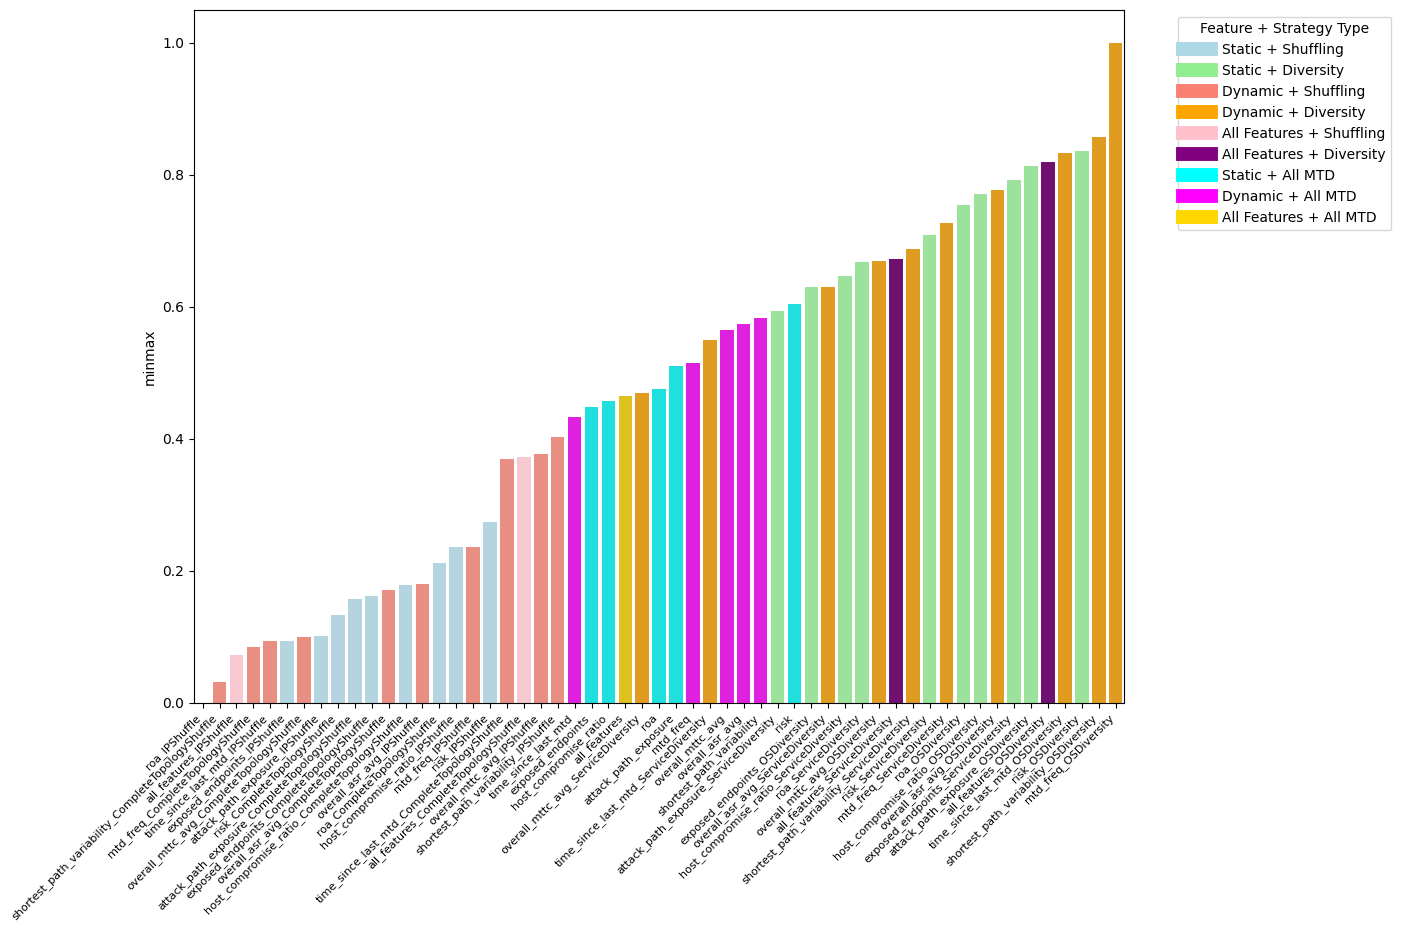

In [14]:
chart.normalized_chart()

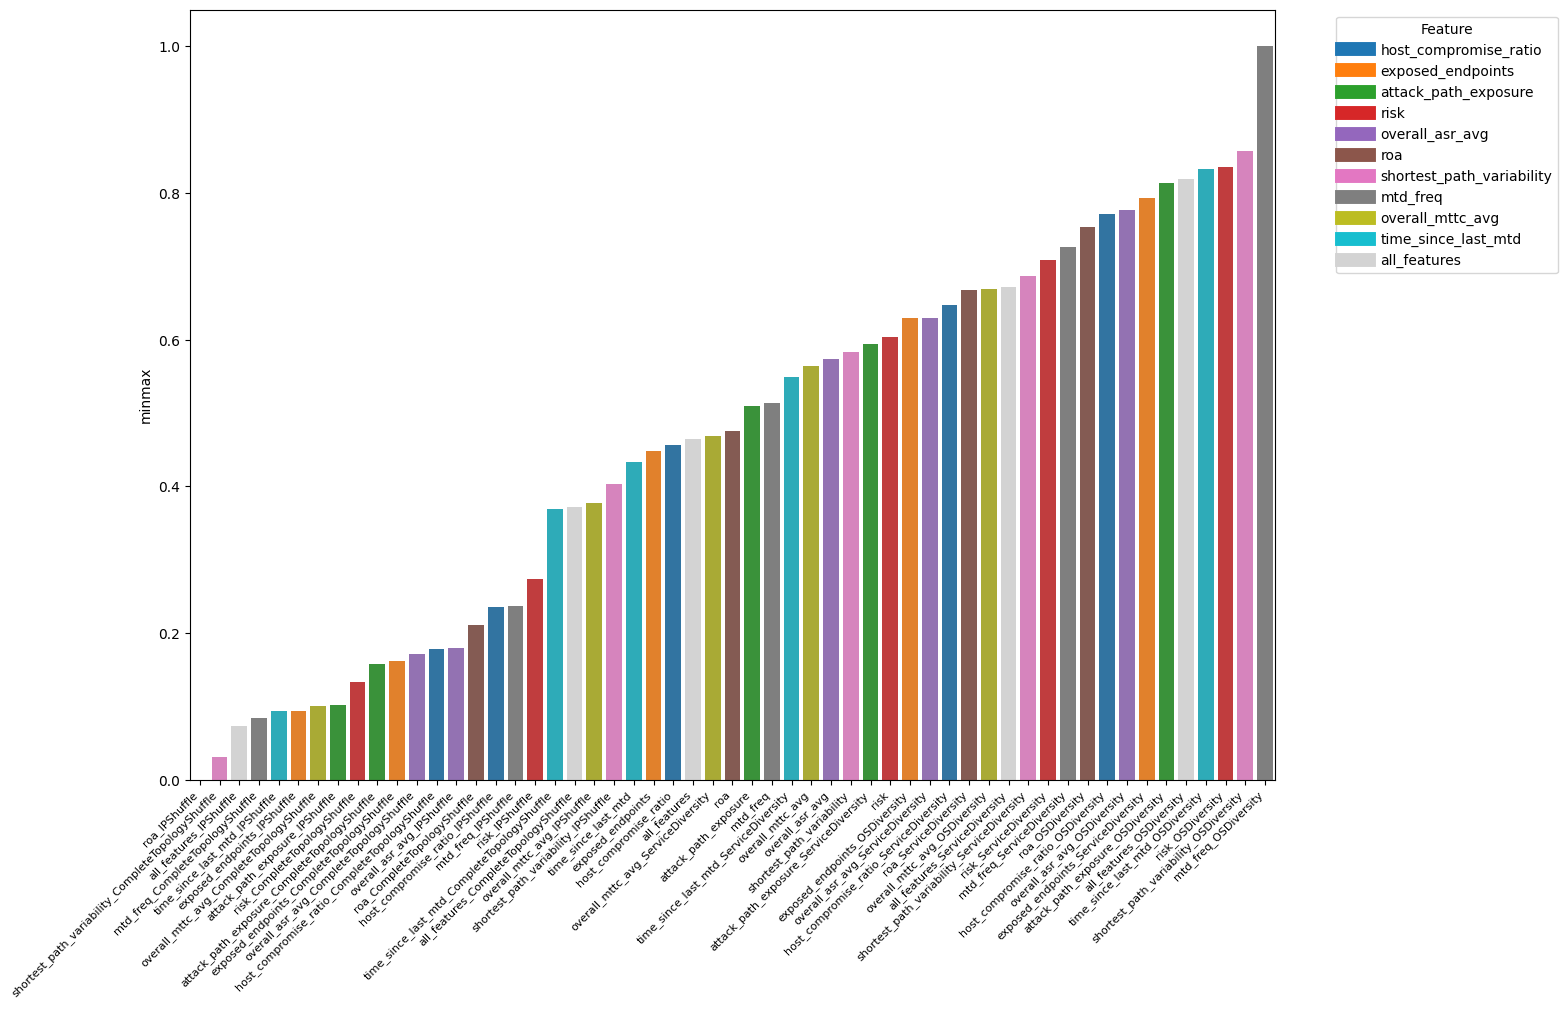

In [15]:
chart.features_only_chart()

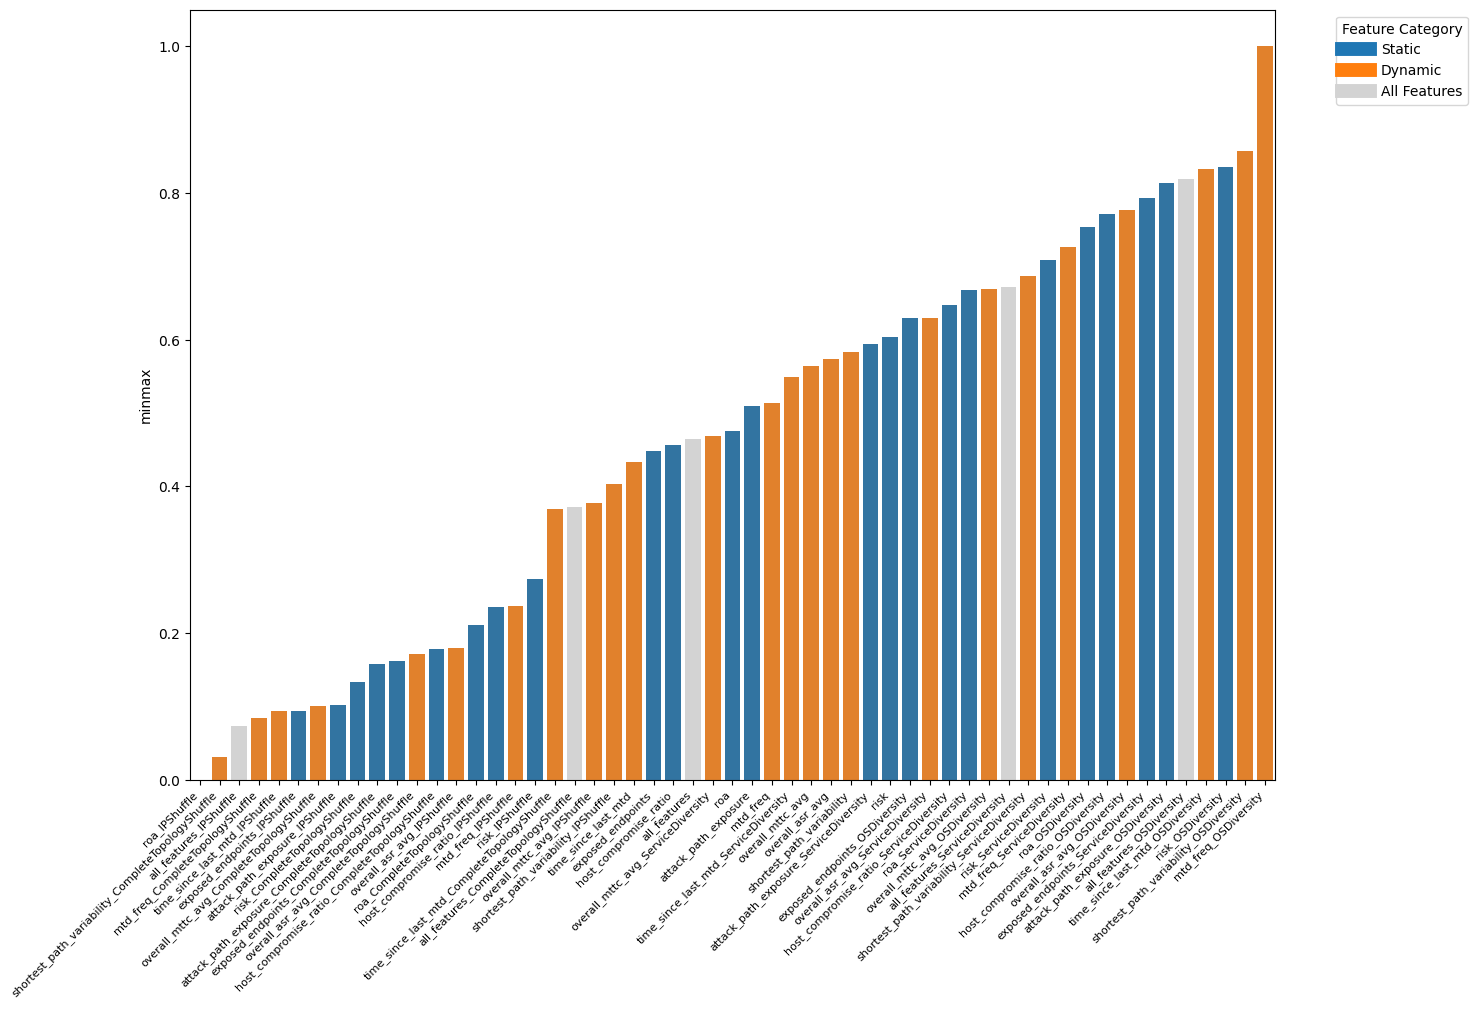

In [16]:
chart.feature_type_only_chart()

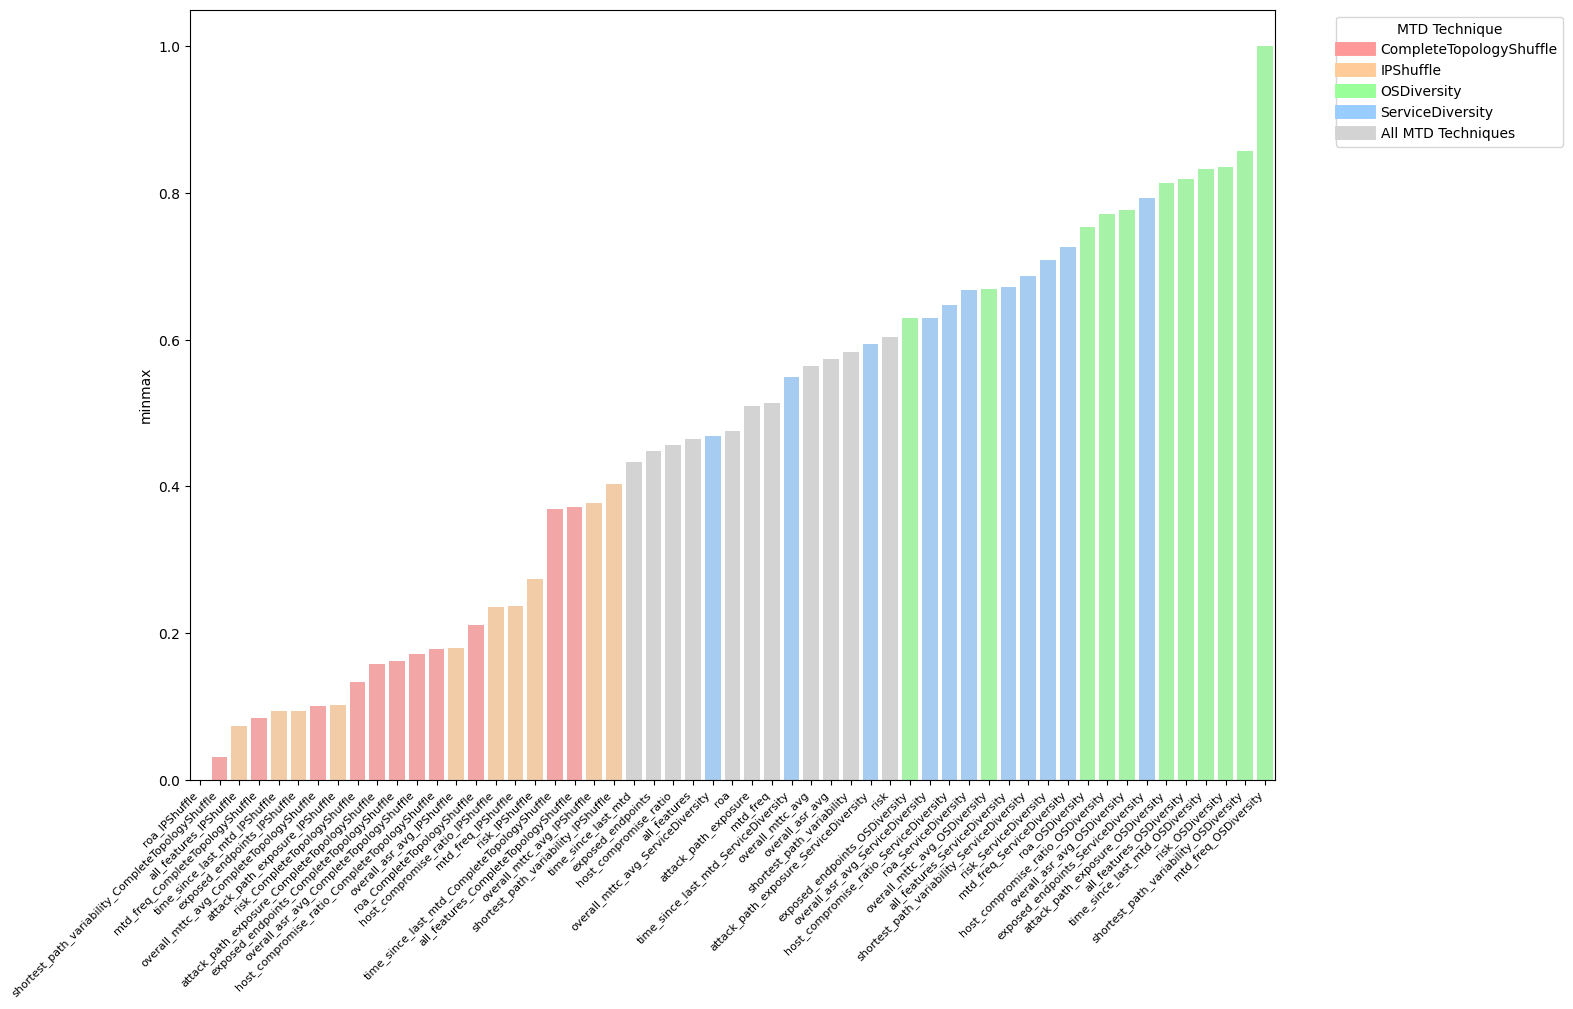

In [17]:
chart.mtd_techniques_chart()

In [18]:
# chart.all_combinations_chart()
# 

In [19]:
data = pd.DataFrame(data)

In [20]:
data.loc['sum'] = data.sum(axis=0)

In [21]:
def group_columns_by_mtd(df):
    mtd_strategies = ['CompleteTopologyShuffle', 'IPShuffle', 'OSDiversity', 'ServiceDiversity']
    
    # Initialize empty groups
    groups = {
        'All MTD': [],
        'CompleteTopologyShuffle': [],
        'IPShuffle': [],
        'OSDiversity': [],
        'ServiceDiversity': []
    }

    # Iterate through each column name in the DataFrame
    for col in df.columns:
        # Check if the column contains any MTD strategy
        if any(mtd in col for mtd in mtd_strategies):
            # Group by the specific MTD strategy found in the column
            for mtd in mtd_strategies:
                if mtd in col:
                    groups[mtd].append(col)
                    break
        else:
            # If no MTD strategy is found in the column, it belongs to 'All MTD'
            groups['All MTD'].append(col)

    return groups


In [22]:
groups = group_columns_by_mtd(data)
import seaborn as sns

In [33]:
for mtd in groups:
    df = data[groups[mtd]].T
    
    print(df)

                                ASR  time_to_compromise  attack_path_exposure  \
all_features               1.541667            1.539001              2.430100   
host_compromise_ratio      1.541667            1.531516              2.460476   
exposed_endpoints          1.527778            1.521255              2.479664   
attack_path_exposure       1.520833            1.512295              2.460476   
overall_asr_avg            1.527778            1.530923              2.476470   
roa                        1.541667            1.535331              2.483239   
shortest_path_variability  1.541667            1.529126              2.516192   
risk                       1.527778            1.532269              2.466128   
mtd_freq                   1.527778            1.521173              2.467674   
overall_mttc_avg           1.527778            1.536620              2.474469   
time_since_last_mtd        1.533333            1.521410              2.454340   

                           

In [24]:
dynamic_metrics = [
    'time_since_last_mtd', 'overall_mttc_avg', 'mtd_freq', 'shortest_path_variability', 'overall_asr_avg', 
]

static_metrics = [
    'exposed_endpoints', 'host_compromise_ratio', 
    'attack_path_exposure', 'roa',
     'risk'
]

metrics = ["all_features"] + static_metrics + dynamic_metrics

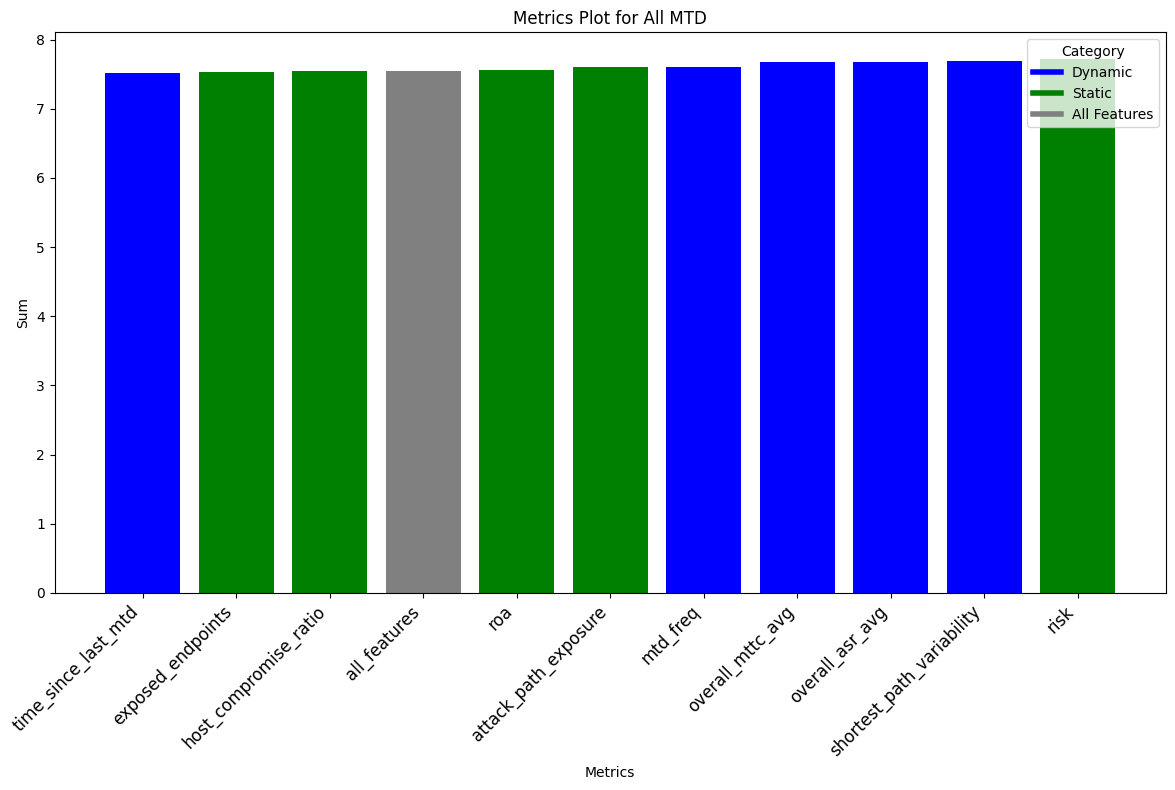

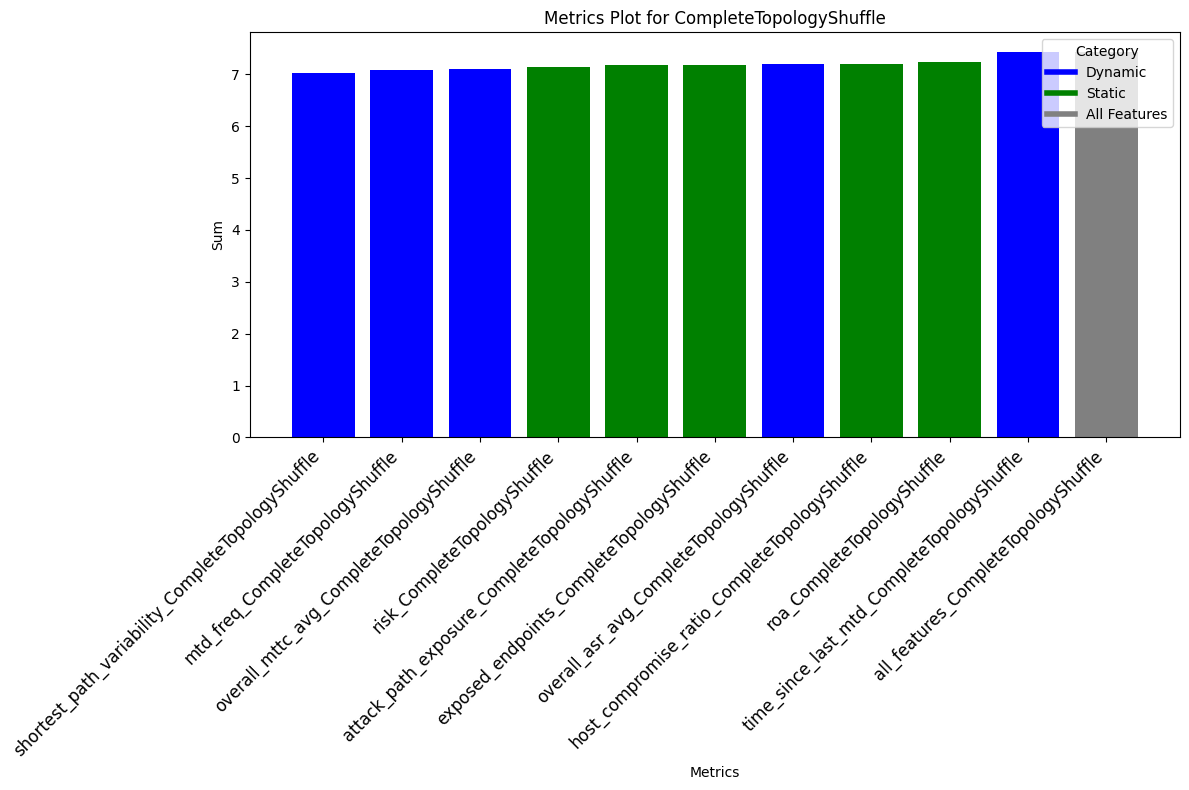

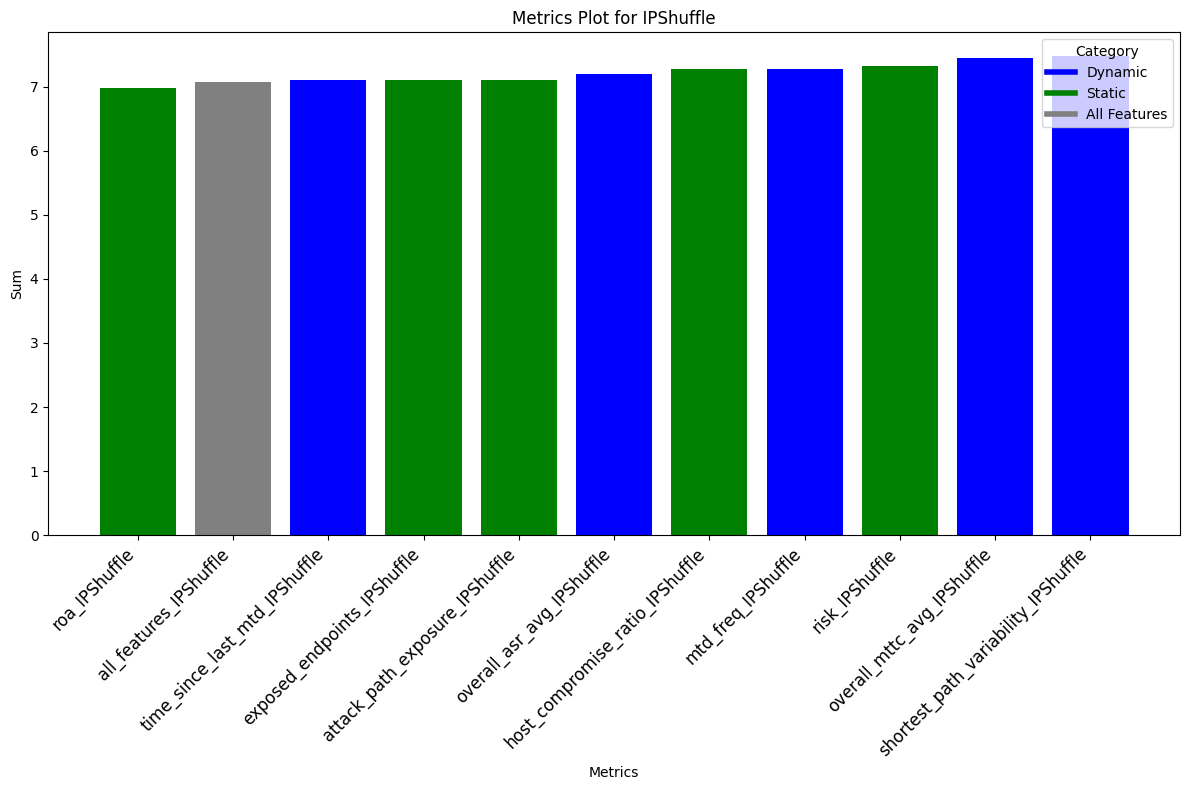

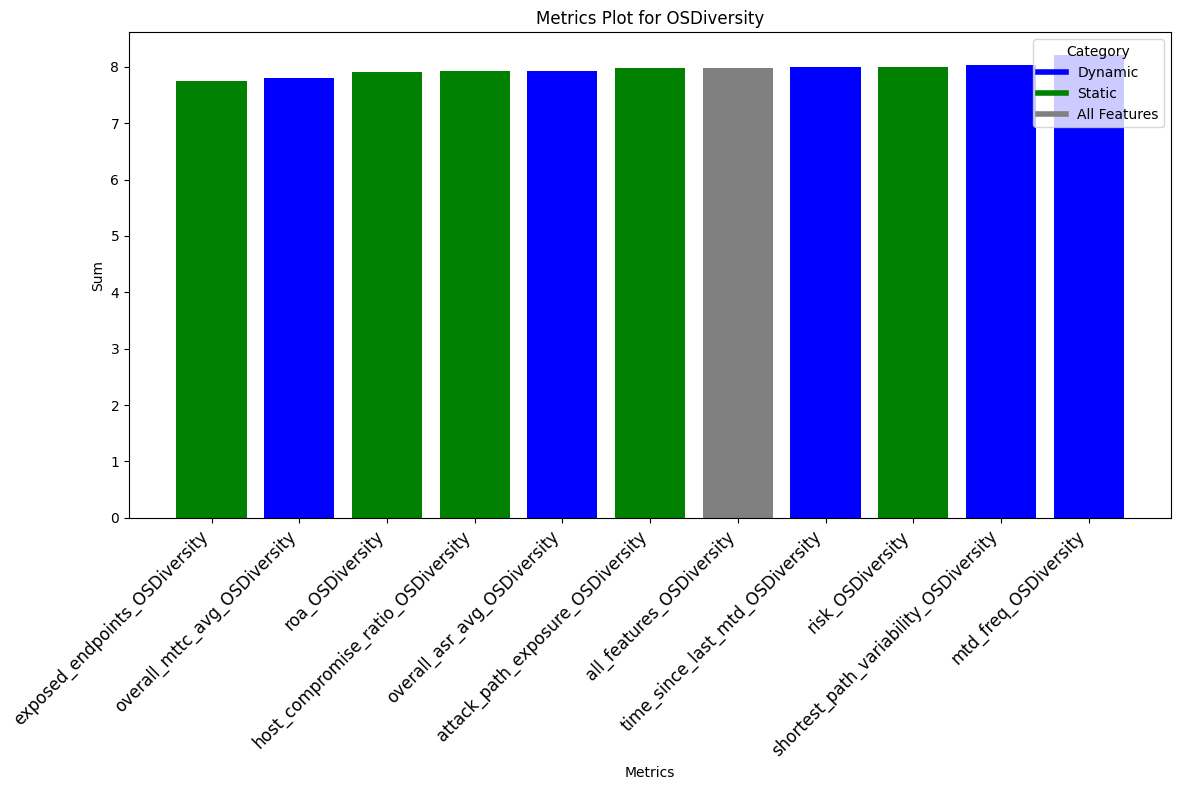

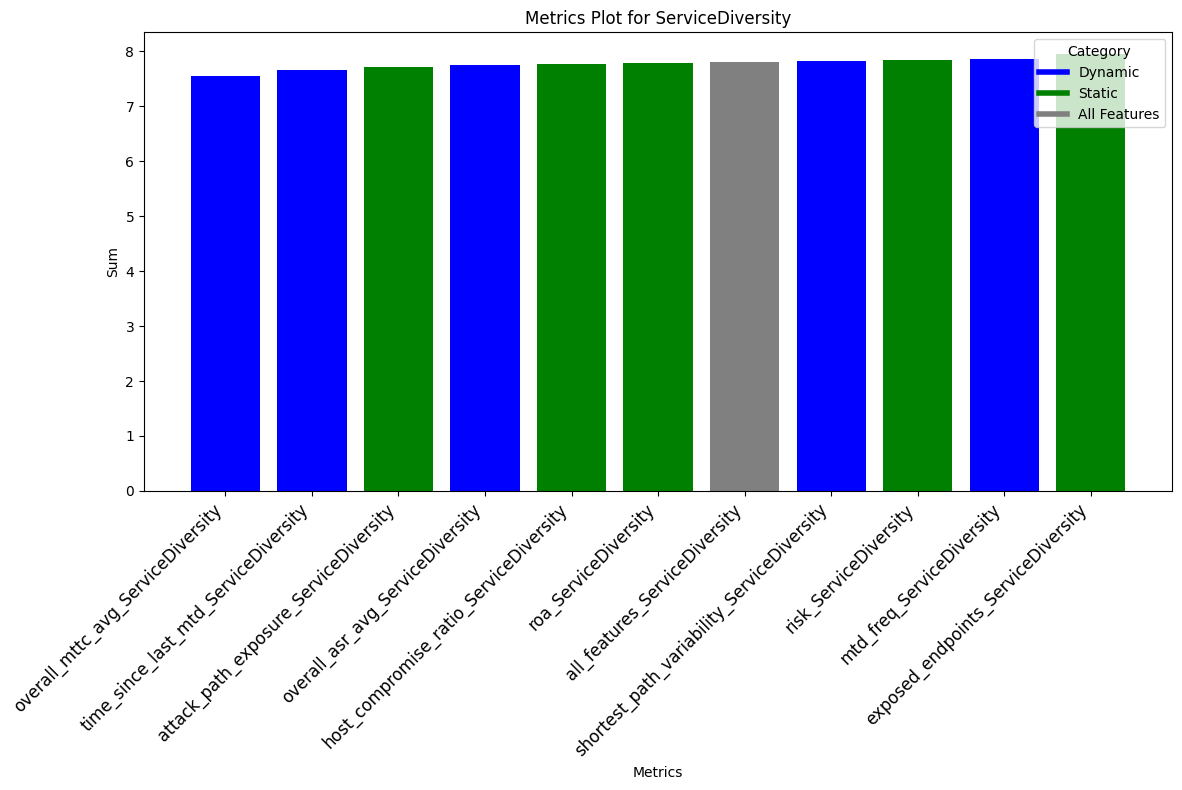

In [25]:
import matplotlib.pyplot as plt

def plot_metrics_by_category(data, groups, dynamic_metrics, static_metrics):
    """
    Plot metrics with color coding based on their category (Dynamic, Static, or All Features).

    Parameters:
    - data (dict): Dictionary with metric data.
    - groups (dict): Dictionary where keys are MTD names and values are lists of metrics.
    - dynamic_metrics (list): List of dynamic metrics.
    - static_metrics (list): List of static metrics.
    """
    # Create a color mapping
    colors = {'Dynamic': 'blue', 'Static': 'green', 'All Features': 'grey'}

    # Create legend handles
    handles = [plt.Line2D([0], [0], color=colors['Dynamic'], lw=4),
               plt.Line2D([0], [0], color=colors['Static'], lw=4),
               plt.Line2D([0], [0], color=colors['All Features'], lw=4)]
    labels = ['Dynamic', 'Static', 'All Features']

    for mtd in groups:
        # Extract and sort the data
        df = data[groups[mtd]].T
        sorted_columns = df.sort_values(by='sum', axis=0).index
        sorted_data = data[sorted_columns].loc['sum']

        # Plot
        fig, ax = plt.subplots(figsize=(12, 8))

        # Plot bars with colors based on category
        for metric in sorted_data.index:
            # Determine category based on metric name
            if any(dyn_metric in metric for dyn_metric in dynamic_metrics):
                category = 'Dynamic'
            elif any(static_metric in metric for static_metric in static_metrics):
                category = 'Static'
            else:
                category = 'All Features'

            ax.bar(metric, sorted_data[metric], color=colors[category])

        # Add labels, title, and legend
        ax.set_xlabel('Metrics')
        ax.set_ylabel('Sum')
        ax.set_title(f'Metrics Plot for {mtd}')
        ax.set_xticklabels(sorted_data.index, rotation=45, ha='right', fontsize=12)
        ax.legend(handles=handles, labels=labels, title='Category')

        # Display the plot
        plt.tight_layout()
        plt.show()

# Example usage:
# Assuming `data` and `groups` are defined, and the metric lists are provided
plot_metrics_by_category(data, groups, dynamic_metrics, static_metrics)


In [26]:
import pandas as pd

def group_by_feature(df):
    # Initialize dictionaries to store median and standard deviation DataFrames
    medians = {}
    std_devs = {}

    for metric in metrics:
        # Find columns that start with the current prefix
        related_columns = [col for col in df.columns if metric in col]
        if related_columns:
            # Calculate the median for each related column
            median_df = df[related_columns].median(axis=1)
            medians[metric] = median_df

            # Calculate the standard deviation for each related column
            std_dev_df = df[related_columns].std(axis=1)
            std_devs[metric] = std_dev_df
    
    # Convert the results into DataFrames for better visualization
    medians_df = pd.DataFrame(medians)
    std_devs_df = pd.DataFrame(std_devs)

    return medians_df, std_devs_df

# Group by feature prefix and calculate the median and standard deviation
medians_df, std_devs_df = group_by_feature(data)


In [27]:
medians_df 

,all_features,exposed_endpoints,host_compromise_ratio,attack_path_exposure,roa,risk,time_since_last_mtd,overall_mttc_avg,mtd_freq,shortest_path_variability,overall_asr_avg
ASR,1.500000,1.500000,1.500000,1.520833,1.500000,1.500000,1.500000,1.500000,1.508287,1.520833,1.500000
time_to_compromise,1.539001,1.521255,1.531516,1.512295,1.535331,1.532269,1.524587,1.536698,1.521173,1.529126,1.530923
attack_path_exposure,2.430100,2.479664,2.460476,2.460476,2.483239,2.466128,2.454340,2.474469,2.467674,2.516192,2.476470
ROA,1.009120,1.022516,1.034561,0.993333,0.979864,1.052973,1.002744,0.976542,1.011896,1.059440,1.014683
risk,1.043650,0.995299,1.034379,1.020626,1.049808,1.082329,1.036367,0.996320,1.101127,1.046922,1.049638
sum,7.549328,7.528396,7.538951,7.603717,7.561879,7.718341,7.510459,7.554184,7.609099,7.693347,7.682240


In [28]:
std_devs_df

,all_features,exposed_endpoints,host_compromise_ratio,attack_path_exposure,roa,risk,time_since_last_mtd,overall_mttc_avg,mtd_freq,shortest_path_variability,overall_asr_avg
ASR,0.072169,0.072436,0.072169,0.070649,0.072169,0.072436,0.075668,0.072436,0.071411,0.069722,0.072436
time_to_compromise,0.099487,0.090070,0.088470,0.106800,0.087280,0.091992,0.090704,0.097644,0.097130,0.096963,0.090577
attack_path_exposure,0.284281,0.343460,0.287308,0.304889,0.303544,0.276895,0.301385,0.298192,0.272276,0.289561,0.321963
ROA,0.057505,0.044494,0.014805,0.016246,0.038634,0.066176,0.062673,0.088224,0.093164,0.083709,0.046093
risk,0.036360,0.075834,0.044482,0.037085,0.055353,0.053785,0.061932,0.098909,0.079675,0.080468,0.045129
sum,0.350250,0.364000,0.312273,0.367175,0.383892,0.361855,0.328616,0.264612,0.449226,0.384897,0.336143


In [29]:
medians_data  = medians_df.T.sort_values("sum", axis=0)
std_devs_data = std_devs_df.T.sort_values("sum", axis=0)

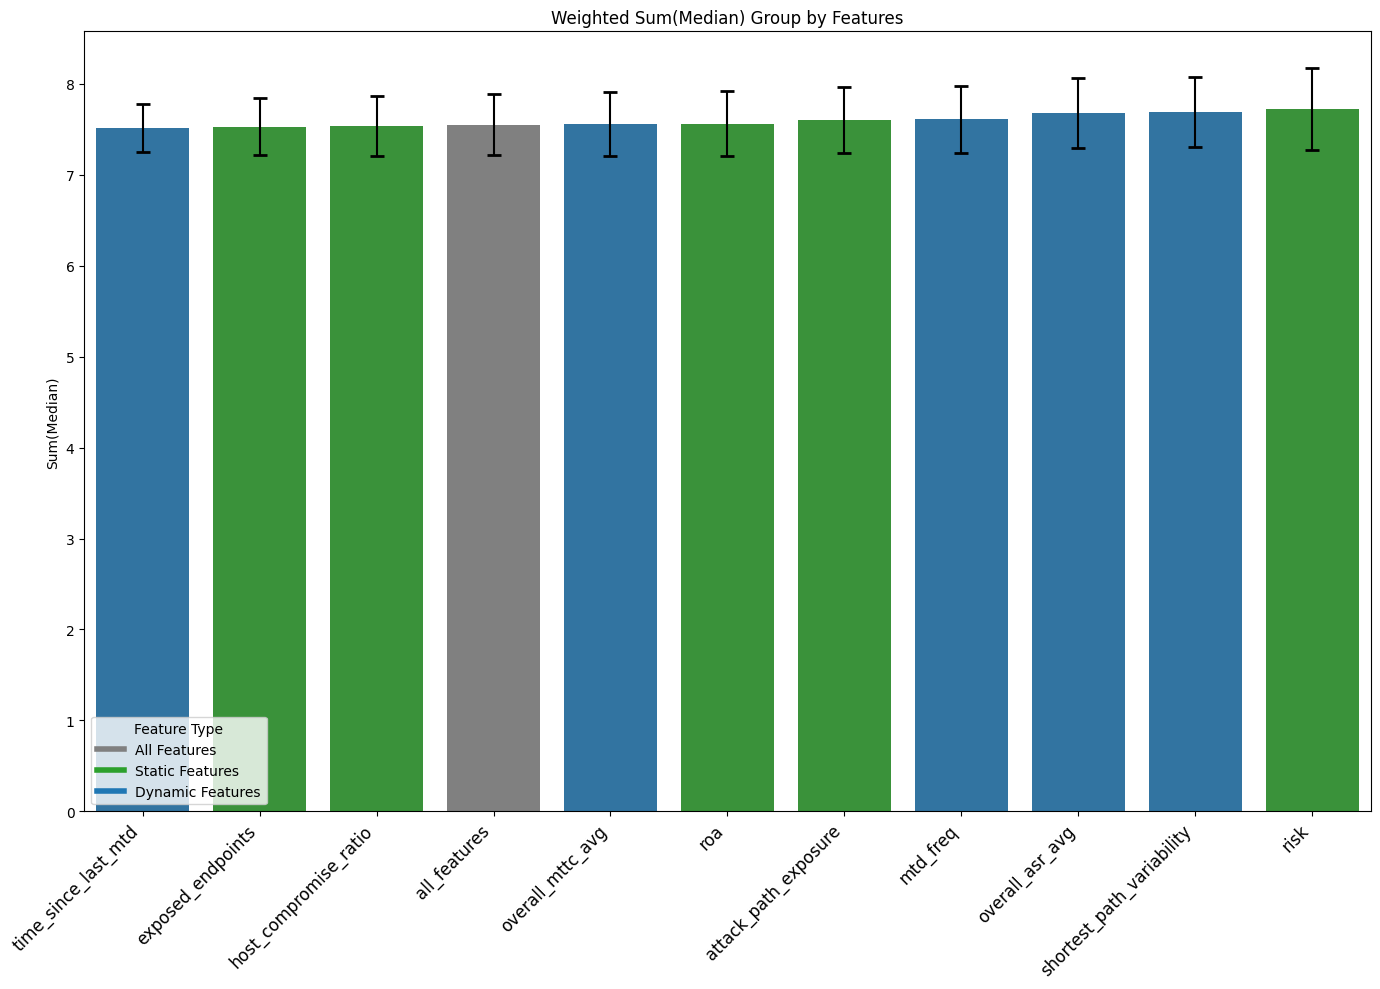

In [30]:
# Define colors for each feature type
colors = {
    'all_features': 'grey',  # Blue
    'static_features': '#2ca02c',  # Orange
    'dynamic_features':  '#1f77b4' # Green
}

# Define labels for the legend
labels = {
    'all_features': 'All Features',
    'static_features': 'Static Features',
    'dynamic_features': 'Dynamic Features'
}

# Function to determine the color for each feature
def get_color(feature):
    if feature == 'all_features':
        return colors['all_features']
    elif feature in static_metrics:
        return colors['static_features']
    elif feature in dynamic_metrics:
        return colors['dynamic_features']
    return '#000000'  # Default color for unknown features

# Map feature names to colors
color_list = [get_color(feature) for feature in medians_data.index]

# Create a bar plot with Seaborn
fig, ax = plt.subplots(figsize=(14, 10))
ax.errorbar(medians_data.index, medians_data['sum'], yerr=std_devs_data['sum'], fmt='none', color='black', capsize=5, capthick=2)

# Create the bar plot with specific colors
barplot = sns.barplot(x=medians_data.index, y=medians_data['sum'], palette=color_list)

# Set the y-label to 'Sum(Median)'
plt.ylabel('Sum(Median)')

# Set title and labels for x-ticks with rotation and font size
plt.title("Weighted Sum(Median) Group by Features")
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-tick labels for better readability

# Create custom legend
handles = [plt.Line2D([0], [0], color=colors[key], linewidth=4) for key in colors]
plt.legend(handles, [labels[key] for key in colors], title='Feature Type')

# Show the plot
plt.tight_layout()
plt.show()

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume `data` is your DataFrame containing all the data

# List of dynamic metrics
dynamic_metrics = [
    'time_since_last_mtd', 'overall_mttc_avg', 'mtd_freq', 'shortest_path_variability', 'overall_asr_avg'
]

# Filter out columns that contain 'Diversity' and dynamic metrics
filtered_columns = [col for col in data.columns 
                    if 'Diversity' in col and any(metric in col for metric in dynamic_metrics)]

# Create a filtered DataFrame
filtered_data = data[filtered_columns]
overall_result = pd.concat([pd.DataFrame(filtered_data), other_schemes], axis=1).drop('sum', axis =0)
chart.process_weighted_metrics(overall_result)


,ASR,time_to_compromise,attack_path_exposure,ROA,risk,sum,zscore,minmax
overall_asr_avg_OSDiversity,1.500000,1.693901,2.659974,1.027035,1.049638,7.930547,0.543107,0.894880
overall_asr_avg_ServiceDiversity,1.500000,1.622224,2.621013,0.981995,1.024612,7.749846,0.330667,0.824859
shortest_path_variability_OSDiversity,1.520833,1.710849,2.659974,1.091311,1.045125,8.028092,0.657785,0.932679
shortest_path_variability_ServiceDiversity,1.500000,1.624228,2.615209,1.022553,1.058672,7.820663,0.413923,0.852301
mtd_freq_OSDiversity,1.508287,1.695454,2.675036,1.128746,1.194303,8.201827,0.862033,1.000000
mtd_freq_ServiceDiversity,1.500000,1.627461,2.538438,1.095605,1.107072,7.868575,0.470250,0.870866
overall_mttc_avg_OSDiversity,1.500000,1.716701,2.659974,0.925607,0.996320,7.798601,0.387987,0.843752
overall_mttc_avg_ServiceDiversity,1.500000,1.594399,2.608279,0.923494,0.928013,7.554184,0.100640,0.749041
time_since_last_mtd_OSDiversity,1.500000,1.695276,2.659974,1.061525,1.081589,7.998365,0.622836,0.921159
time_since_last_mtd_ServiceDiversity,1.479167,1.604064,2.579470,0.998388,0.990844,7.651933,0.215558,0.786918


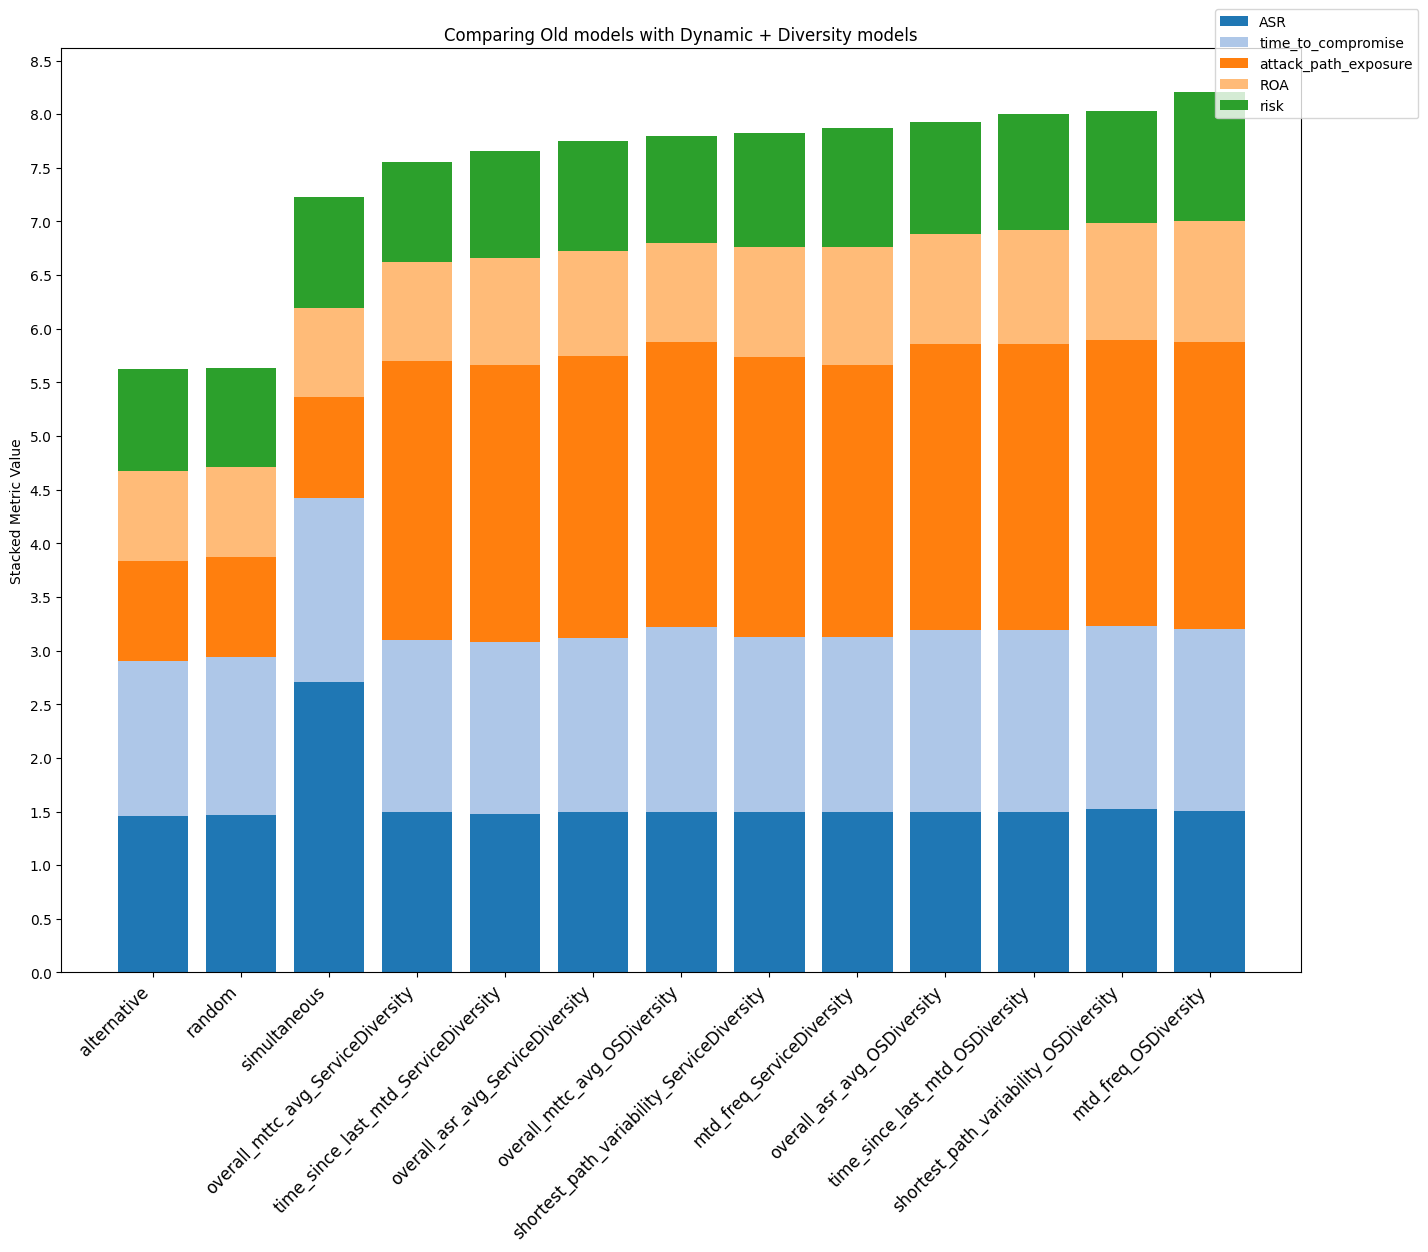

In [32]:
chart.plot_n_schemes(font_size=12, title="Comparing Old models with Dynamic + Diversity models")

In [41]:
for metric in metrics:
    matched_columns = data[data.columns[data.columns.str.contains(metric)]]


In [42]:
matched_columns

,overall_asr_avg,overall_asr_avg_CompleteTopologyShuffle,overall_asr_avg_IPShuffle,overall_asr_avg_OSDiversity,overall_asr_avg_ServiceDiversity
ASR,1.527778,1.500000,1.666667,1.500000,1.500000
time_to_compromise,1.530923,1.485728,1.490960,1.693901,1.622224
attack_path_exposure,2.476470,2.211664,1.889214,2.659974,2.621013
ROA,1.073314,0.951746,1.014683,1.027035,0.981995
risk,1.073756,1.042246,1.140441,1.049638,1.024612
sum,7.682240,7.191383,7.201965,7.930547,7.749846


In [54]:
new_data = data

In [78]:
new_data.loc['rank'] = new_data.T['sum'].rank(ascending=False)

In [79]:
new_data

,all_features,all_features_CompleteTopologyShuffle,all_features_IPShuffle,all_features_OSDiversity,all_features_ServiceDiversity,host_compromise_ratio,host_compromise_ratio_CompleteTopologyShuffle,host_compromise_ratio_IPShuffle,host_compromise_ratio_OSDiversity,host_compromise_ratio_ServiceDiversity,...,overall_mttc_avg,overall_mttc_avg_CompleteTopologyShuffle,overall_mttc_avg_IPShuffle,overall_mttc_avg_OSDiversity,overall_mttc_avg_ServiceDiversity,time_since_last_mtd,time_since_last_mtd_CompleteTopologyShuffle,time_since_last_mtd_IPShuffle,time_since_last_mtd_OSDiversity,time_since_last_mtd_ServiceDiversity
ASR,1.541667,1.500000,1.666667,1.500000,1.500000,1.541667,1.500000,1.666667,1.500000,1.500000,...,1.527778,1.500000,1.666667,1.500000,1.500000,1.533333,1.500000,1.666667,1.500000,1.479167
time_to_compromise,1.539001,1.472921,1.490427,1.705920,1.636373,1.531516,1.463085,1.509948,1.681476,1.622091,...,1.536620,1.452389,1.536698,1.716701,1.594399,1.521410,1.460346,1.524587,1.695276,1.604064
attack_path_exposure,2.430100,2.259621,1.963146,2.659974,2.612895,2.460476,2.188711,1.946506,2.624508,2.583177,...,2.474469,2.211664,1.946506,2.659974,2.608279,2.454340,2.217121,1.917254,2.659974,2.579470
ROA,1.003314,1.103992,0.949342,1.048733,1.009120,1.023495,1.012679,1.046708,1.046538,1.034561,...,1.085373,0.976542,1.109508,0.925607,0.923494,0.965008,1.123553,1.002744,1.061525,0.998388
risk,1.035247,1.098857,1.001395,1.066848,1.043650,0.981797,1.034379,1.099603,1.070677,1.031752,...,1.046105,0.963792,1.182244,0.996320,0.928013,1.036367,1.131064,0.985090,1.081589,0.990844
sum,7.549328,7.435391,7.070978,7.981475,7.802039,7.538951,7.198854,7.269432,7.923198,7.771581,...,7.670345,7.104386,7.441622,7.798601,7.554184,7.510459,7.432084,7.096342,7.998365,7.651933
rank,30.000000,36.000000,53.000000,5.000000,14.000000,31.000000,43.000000,40.000000,9.000000,17.000000,...,24.000000,49.000000,35.000000,15.000000,29.000000,33.000000,37.000000,51.000000,4.000000,25.000000


In [80]:
for metric in metrics:
    rank = new_data[new_data.columns[new_data.columns.str.contains(metric)]]
    rank = rank.loc['rank'].median()

    print(metric, rank)

all_features 30.0
exposed_endpoints 32.0
host_compromise_ratio 31.0
attack_path_exposure 27.0
roa 28.0
risk 20.0
time_since_last_mtd 33.0
overall_mttc_avg 29.0
mtd_freq 26.0
shortest_path_variability 22.0
overall_asr_avg 23.0


In [81]:
new_data[new_data.columns[new_data.columns.str.contains('risk')]]

,risk,risk_CompleteTopologyShuffle,risk_IPShuffle,risk_OSDiversity,risk_ServiceDiversity
ASR,1.527778,1.500000,1.666667,1.500000,1.500000
time_to_compromise,1.532269,1.476040,1.516894,1.698837,1.634764
attack_path_exposure,2.466128,2.223322,1.989603,2.659974,2.589975
ROA,1.109837,0.962189,1.052973,1.115480,1.006044
risk,1.082329,0.983348,1.089948,1.026924,1.116626
sum,7.718341,7.144899,7.316086,8.001215,7.847409
rank,20.000000,47.000000,38.000000,3.000000,12.000000
